In [216]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('BlackFriday.csv', sep=',')

In [3]:
df['Age'] = df['Age'].replace({'0-17':int(15), '55+':int(65),'18-25':int(22),'26-35':int(31),'36-45':int(41),'46-50':int(48),'51-55':int(53)})

In [4]:
df['Age'].dtype

dtype('int64')

In [5]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


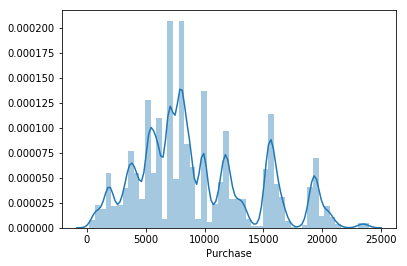

In [6]:
sns.distplot(df.loc[:,'Purchase']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117442a90>]],
      dtype=object)

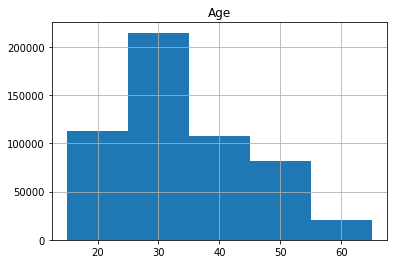

In [7]:
df.hist('Age', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176ab128>]],
      dtype=object)

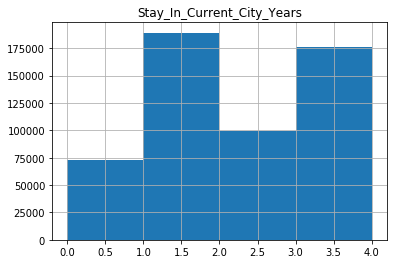

In [8]:
df.hist('Stay_In_Current_City_Years',bins=4)

This is surprising. I thought the last bin would be much larger because it includes all of the people who have been their not only 4 years but any number of years greater than 4. 

In [12]:
df.drop('User_ID', inplace=True, axis=1)
df.drop('Product_ID', inplace=True, axis=1)

Now I am trying to see if there is any relationship between age and purchase. I hypothesize that there is a positive relationship and that people who are older will, on average, tend to spend more. 

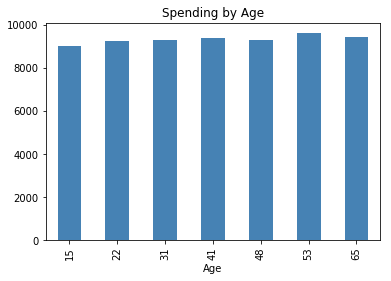

In [40]:
df.groupby('Age')['Purchase'].mean().plot.bar(
    title='Mean Spending by Age', color='steelblue')

The numbers look high but that is becuase, I suspect, they are in a currency other than dollars. Since Analytics Vidhya is an indian website I assume they are rupies. 

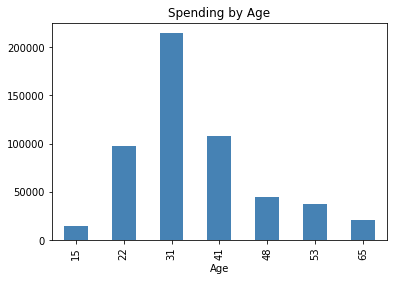

In [41]:
df.groupby('Age')['Purchase'].count().plot.bar(
    title='Count of Spending by Age', color='steelblue')

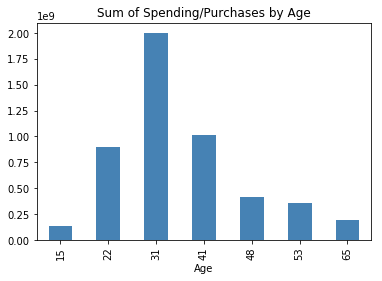

In [43]:
df.groupby('Age')['Purchase'].sum().plot.bar(
    title='Sum of Spending/Purchases by Age', color='steelblue')

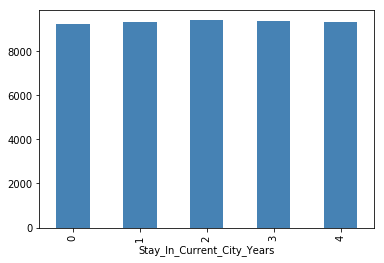

In [15]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()\
            .plot.bar(color='steelblue')

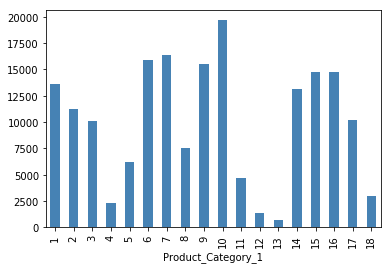

In [16]:
df.groupby('Product_Category_1')['Purchase'].mean()\
            .plot.bar(color='steelblue')

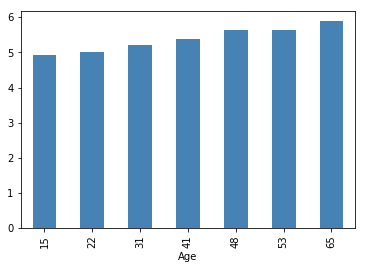

In [17]:
df.groupby('Age')['Product_Category_1'].mean()\
            .plot.bar(color='steelblue')

I know the average of the product categories is not meaningful here but it does show that there is some relationship between the age of the shopper and the products they buy. Maybe a heatmap?

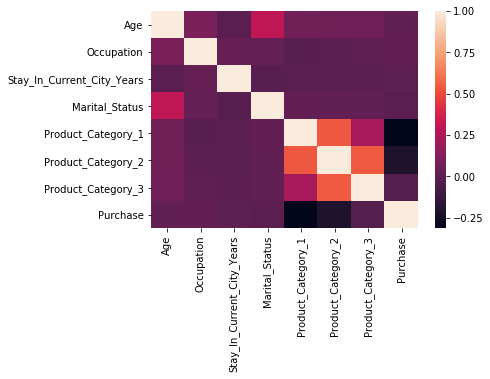

In [18]:
sns.heatmap(df.corr())

This is unexciting. The only real correlations are with the variables themselves. Age is correlated with marital status and, to a lesser extent, with occupation. Product Category is correlated with its subcategories. Not much for a regression to grab on to. 

Some of the variables that are treated like interval level variables are not interval level variables, too, like occupation. 

And it kind of bugs me that we use product category to predict purchases. If we know what the person bought it is not that hard ot predict what they spent, no? I mean, prices are naturally correlated to produt category but it is is not useful information. We want to predict the purchases of people based on their characteristics, not their behavior once they are in the store. Things in category 13 cost a lot less than things in category 10 so people that buy things in category 10 are going to spend more money, but what good does that do us?

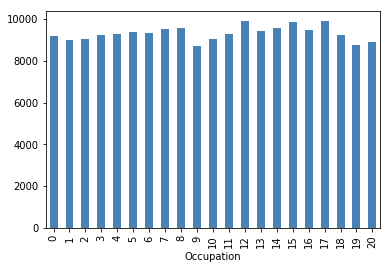

In [19]:
df.groupby('Occupation')['Purchase'].mean()\
            .plot.bar(color='steelblue')

This shows why the variable occupation should be treated as a categorical variable, I think. 

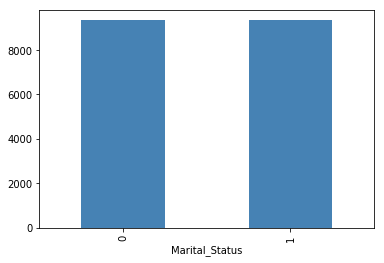

In [20]:
df.groupby('Marital_Status')['Purchase'].mean()\
            .plot.bar(color='steelblue')

These are almost indistinguishable. 

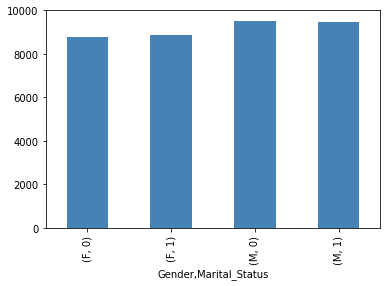

In [21]:
df.groupby(['Gender', 'Marital_Status'])['Purchase'].mean()\
            .plot.bar(color='steelblue')

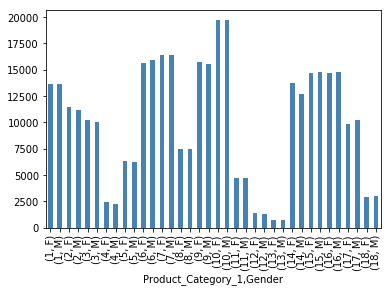

In [22]:
df.groupby(['Product_Category_1','Gender'])['Purchase'].mean()\
            .plot.bar(color='steelblue')

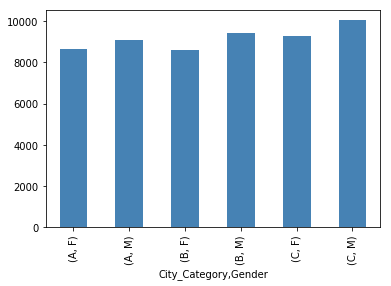

In [23]:
df.groupby(['City_Category', 'Gender'])['Purchase'].mean()\
            .plot.bar(color='steelblue')

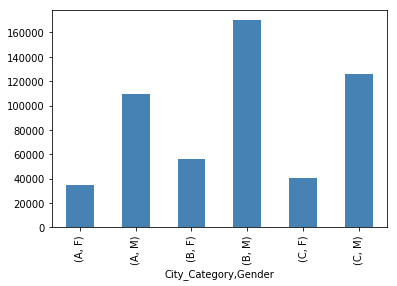

In [38]:
df.groupby(['City_Category', 'Gender'])['Purchase'].count()\
            .plot.bar(color='steelblue')

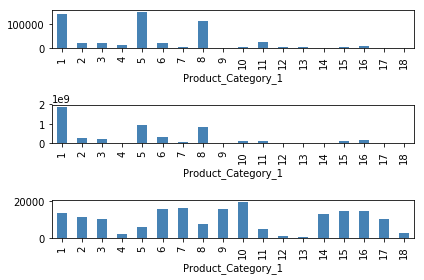

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=1)
axs = axs.flatten()

plt.subplot(3,1,1)

df.groupby(['Product_Category_1'])['Purchase'].count()\
            .plot.bar(color='steelblue');

plt.subplot(3,1,2)

df.groupby(['Product_Category_1'])['Purchase'].sum()\
            .plot.bar(color='steelblue');

plt.subplot(3,1,3)

df.groupby(['Product_Category_1'])['Purchase'].mean()\
            .plot.bar(color='steelblue');

fig.tight_layout()

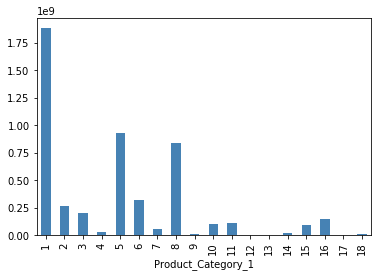

In [26]:
df.groupby(['Product_Category_1'])['Purchase'].sum().plot.bar(color='steelblue');

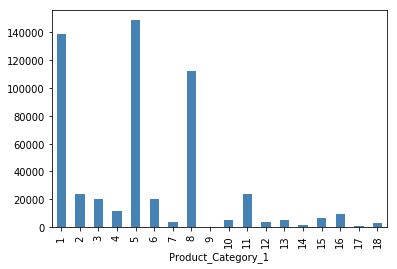

In [27]:
df.groupby(['Product_Category_1'])['Purchase'].count().plot.bar(color='steelblue');

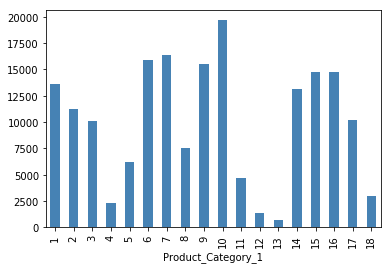

In [28]:
df.groupby(['Product_Category_1'])['Purchase'].mean().plot.bar(color='steelblue');

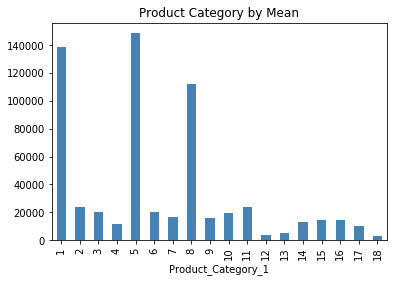

In [29]:
plt.figure()


plt.ax1 = df.groupby(['Product_Category_1'])['Purchase'].mean().plot.bar(color='steelblue', title='Product Category by Mean');

ax2 = df.groupby(['Product_Category_1'])['Purchase'].count().plot.bar(color='steelblue');

The thing about using Product Category is that we are coming dangerously close to predicting the price of the product rather than the behavior of the consumer. 

This is why it is strictly speaking wrong to include the Product ID in the analysis and even more wrong to put User ID in the analysis. To put User ID in the analysis is like saying that you buy a lot of stuff because you buy a lot of stuff. It is true that a person who has bought a lot of stuff in the past is likely to buy a lot of stuff in the future, but what does that get us? We are trying to find ways to change business policy. It is no policy to say "Try to sell things to Mark Jones because Mark Jones buys a lot of stuff". We need some general characteristic that can serve as the basis for some general policy. Concentrate efforts on the age group, city, gender, or something that can be used as the basis for a general policy. 

## Gender and Department Store Shopping
You think that women are the primary market for Department stores, but that is not necessarily the case in India.  

In examining the data from Analytics Vidhya, a data science website bases in India, we first find that the total purchases by men are far greater than those of women. 

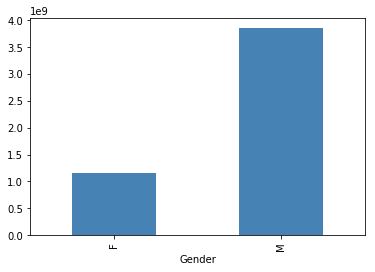

In [49]:
df.groupby('Gender')['Purchase'].sum().plot.bar(color='steelblue')

My first thought was that maybe women do the high volume shopping but men purchase the big ticket items but this was not born out by the data. Men also best women in the number of purchases:

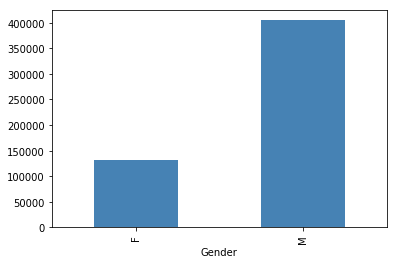

In [51]:
df.groupby('Gender')['Purchase'].count().plot.bar(color='steelblue')

There are, as of this writing, about 69 rupies to the dollar, so the average purchase works out to be about $132, which seems a little high to me. Lets check it with the `.mean()` method.

In [53]:
df.groupby('Gender')['Purchase'].mean()/69

Gender
F    127.677701
M    137.750315
Name: Purchase, dtype: float64

So that checks out, with 132 being just halfway between 127 and 137. It seems that men do make somewhat larger purchased but by nowhere near the amount necessary to account for the amount by which they out spend women.  

How can we account for this? Do men spend more on a particularly expensive product category or to they just purchase more of everything? We can get a sense of this from the product category variable. 

In [149]:
male_means = df[df['Gender']=='M'].groupby(['Product_Category_1', 'Gender'])['Purchase'].count()/len(df[df['Gender']=='M'])
female_means = df[df['Gender']=='F'].groupby(['Product_Category_1', 'Gender'])['Purchase'].count()/len(df[df['Gender']=='F'])

male_stderr = df[df['Gender']=='M'].groupby(['Product_Category_1', 'Gender'])['Purchase'].std()/len(df[df['Gender']=='M'])
female_stderr = df[df['Gender']=='F'].groupby(['Product_Category_1', 'Gender'])['Purchase'].std()/len(df[df['Gender']=='F'])


<Figure size 432x288 with 0 Axes>

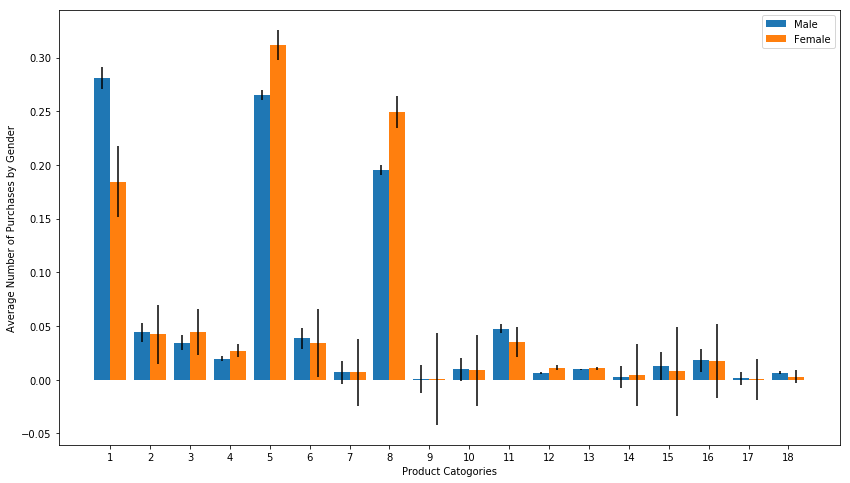

In [418]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
# plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.clf()
# plt.cla()
# fig = plt.gcf()




fig, ax = plt.subplots()

ind = df['Product_Category_1'].unique()
ind = np.array(sorted(ind))

fig.set_size_inches(14, 8)

width = 0.40  

p1 = plt.bar(ind, male_means, width, yerr=male_stderr, label='Male')
p2 = plt.bar(ind + width, female_means, width, yerr=female_stderr, label='Female')

ax.set_xlabel('Product Catogories')
ax.set_ylabel('Average Number of Purchases by Gender')
# plt.title('Purchases by Product Category and Gender')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'))

# ax.set_xticks(ind + width / 2)  [r + width for r in range(len(df['Product_Category_1'].unique()))],

# ax.set_xticklabels((str(x) for x in range(1,19)))
# ax.set_xticklabels(ind);
plt.legend();

Notice how the error bars overlap in all but the three categories with the largest spending differences between men and women. In only three categories is the difference between the spending of men and women statistically significant. Indeed, in many of the categories the error bar includes zero meaning we can't say with any confidence that the gender in question spent any money at all!

In [273]:
orig_dict = {}
for i,j in zip([x for x in range(1,19)],diff):
    orig_dict[i] = j
print(orig_dict)

{1: 0.09651862748908485, 2: 0.002063456634068879, 3: -0.009959859063205803, 4: -0.007298044412406009, 5: -0.046729189605491606, 6: 0.004850963550286691, 7: -0.0002607362347784737, 8: -0.05389129212015187, 9: 0.00029440552627554113, 10: 0.0009974371746762044, 11: 0.01236925977507932, 12: -0.005457907923230989, 13: -0.0009051736895549639, 14: -0.002448948541964582, 15: 0.005039683148197288, 16: 0.00021682876831089284, 17: 0.0007867789956068137, 18: 0.0038137105291977773}


In [272]:
ord_dict = OrderedDict()
for i,j in zip(diff, [x for x in range(1,19)]):
    ord_dict[i] = j
print(ord_dict)

OrderedDict([(0.09651862748908485, 1), (0.002063456634068879, 2), (-0.009959859063205803, 3), (-0.007298044412406009, 4), (-0.046729189605491606, 5), (0.004850963550286691, 6), (-0.0002607362347784737, 7), (-0.05389129212015187, 8), (0.00029440552627554113, 9), (0.0009974371746762044, 10), (0.01236925977507932, 11), (-0.005457907923230989, 12), (-0.0009051736895549639, 13), (-0.002448948541964582, 14), (0.005039683148197288, 15), (0.00021682876831089284, 16), (0.0007867789956068137, 17), (0.0038137105291977773, 18)])


Now I have the values in an ordered dict with their indexes, the category numbers, as thier values. Next, I want to create a new dictionary with those same values as keys, but this time with thier absolute values. 

In [266]:
abs_val_dict = dict()
for key, value in ord_dict.items():
    abs_val_dict[abs(key)] = value
print(abs_val_dict)

{0.09651862748908485: 1, 0.002063456634068879: 2, 0.009959859063205803: 3, 0.007298044412406009: 4, 0.046729189605491606: 5, 0.004850963550286691: 6, 0.0002607362347784737: 7, 0.05389129212015187: 8, 0.00029440552627554113: 9, 0.0009974371746762044: 10, 0.01236925977507932: 11, 0.005457907923230989: 12, 0.0009051736895549639: 13, 0.002448948541964582: 14, 0.005039683148197288: 15, 0.00021682876831089284: 16, 0.0007867789956068137: 17, 0.0038137105291977773: 18}


Now I use the absolute values to sort the dictionary values by the absolute value of their keys and I will save this to another data structure.

In [270]:
category_list = []
for i in sorted(abs_val_dict.keys(),reverse=True):
    category_list.append(abs_val_dict[i])
print(category_list)

[1, 8, 5, 11, 3, 4, 12, 15, 6, 18, 14, 2, 10, 13, 17, 9, 7, 16]


Then I use this list of category names to get the original values.

In [319]:
values = []
for i in category_list:
    values.append(orig_dict[i])
    
print(values)
values_arr = np.array(values)
category_arr = np.array(category_list)

[0.09651862748908485, -0.05389129212015187, -0.046729189605491606, 0.01236925977507932, -0.009959859063205803, -0.007298044412406009, -0.005457907923230989, 0.005039683148197288, 0.004850963550286691, 0.0038137105291977773, -0.002448948541964582, 0.002063456634068879, 0.0009974371746762044, -0.0009051736895549639, 0.0007867789956068137, 0.00029440552627554113, -0.0002607362347784737, 0.00021682876831089284]


In [345]:
category_arr_str = [str(i) for i in category_arr]

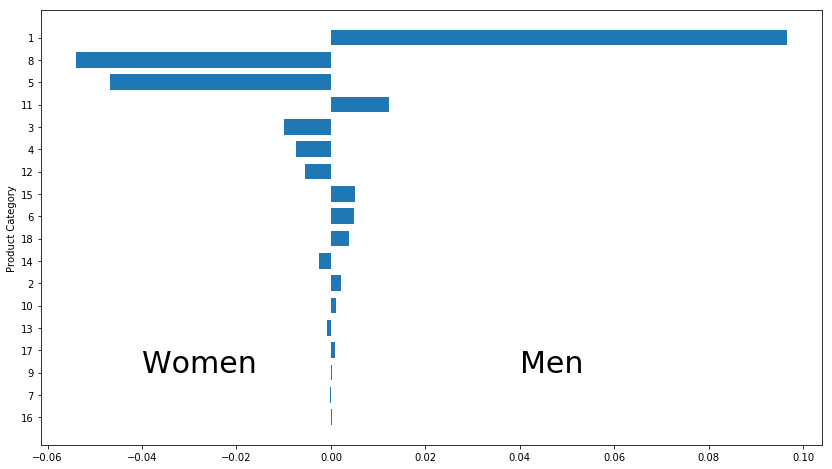

In [444]:
plt.clf()
plt.cla()

fig = plt.gcf()

fig.set_size_inches(14, 8)

width = 0.70
# plt.bar(categories=category_list,height=values)
plt.barh(category_arr_str[::-1], values_arr[::-1], width)
# plt.xlabel('Difference in Proportion')
plt.xticks=category_arr_str


plt.ylabel('Product Category')


plt.annotate(xy = [-0.04, 2], s='Women', fontsize=30)
plt.annotate(xy = [0.04, 2], s='Men', fontsize=30);
# plt.title('Biggest Differences in Male and Female Spending by Category');

We subtract the percentage of women who make a purchase in a category from the percentage of men and report the differences. Positive proportions means that more men buy from the product category than women and negative numbers the opposite. Here we present the categories in order of the differences.

So for product category 1 the percentage of men who buy something in that category outstrips the percentage of women by 10%. Product category 2 is favored by women by 5% and category 3 by slightly less. As we learned from the previous chart, the other differences are not statistically significant.  